## Ein Autoencoder ist ein neuronales Netz, welches versucht die Eingangsinformationen zu komprimieren und mit den reduzierten Informationen im Ausgang wieder korrekt nachzubilden
An autoencoder is an unsupervised learning technique for neural networks that learns efficient data representations (encoding) by training the network to ignore signal “noise.” Autoencoders can be used for image denoising, image compression, and, in some cases, even generation of image data.
Erklärung hierzu, jedoch nicht das Beispiel:https://www.tensorflow.org/tutorials/generative/autoencoder

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
#MNIST DATA SET
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data()

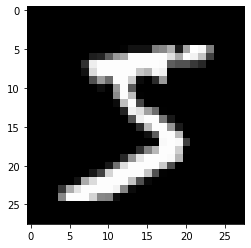

In [4]:
#Erste Bild (array 0) anzeigen
#cmap https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html
plt.imshow(x_train[0], cmap="gray")

In [5]:
#Shape anzeigen lassen (Dataset in Grautufen)
x_train[0].shape

(28, 28)

In [6]:
28*28 #mit rgb *3 nehmen, 784 features- Ziel die Features runtercompressen, damit Neural network besser arbeiten kann.
#wenn ein NN Probleme hat, etwas zu lernen, sollte der erste Gedanke immer sein die eingegeben Daten zu komprimieren

784

In [7]:
x_train[0]
# daten gehen von 0- 255. Vorgehensweise = Das Datenset durch 255 teilen 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Preprocessing (Werte die oben zwischen 0-255 liegen, auf -1 bis +1 kriegen

In [8]:
x_train = x_train/255.0

In [9]:
# die Werte sind nun zwischen 0 und 1. Bei neuronalen Netzwerken immer zwischen -1 bis +1 bleiben. 
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Autoencoder mapt input zum output, einziges Manko ist dass das OutputLayer ein exact match zum input ist, also hier (28,28,1)

In [10]:
#784 features komprimieren um Arbeit für nn einfacher zu machen
#defining encoder 
#Input layer Keras (28, 28 von oben nehmen und 1 als Channel da wir Graustufen haben, bei rbg wäre es 3), Namen geben = img, da wir ein einfaches Datenset haben brauchen wir keine convolutional layer
encoder_input = keras.Input(shape=(28,28,1), name="img")
# Flatten Layers 
x = keras.layers.Flatten()(encoder_input)
#dense Layers https://keras.io/api/layers/activations/, https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/
encoder_output = keras.layers.Dense(64,activation="relu")(x)
#encoder
encoder = keras.Model (encoder_input, encoder_output, name ="encoder")
#defining decoder
#Für den Decoder könnte man bei einem komplizierten Beispiel die dense layer schritt für schritt einfügen von 64 auf 784 auf 28,28,1 und daraufhin der output der mapt zum encoder input 28,28,1
#Jedoch hier gehen wir direkt zu 784
decoder_input = keras.layers.Dense(784, activation="relu")(encoder_output)
#x = keras.layers.Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape ((28,28,1))(decoder_input)
#Spezfizieren des Optimizers https://keras.io/api/optimizers/
#decay = What is decay factor? In mathematics, exponential decay describes the process of reducing an amount by a consistent percentage rate over a period of time. It can be expressed by the formula y=a(1-b)x wherein y is the final amount, a is the original amount, b is the decay factor, and x is the amount of time that has passed
opt = keras.optimizers.Adam(lr=0.0001, decay = 1e-6)

autoencoder = keras.Model (encoder_input, decoder_output, name="autoencoder")
autoencoder.summary ()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               50960     
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


Erklärung zu Model Autoencoder:
Das Dense Layer produziert einen Cektor von 784 Werten und was auch immer da rausgekommen ist, wird wieder reshaped in 28,28,1

 ### Training
 Sinn hinter diesem Training ist nun das obige Model von 784 Features auf 64 Features zu bekommen. 
 64 Features = ein Vektor mit 64 Werten
 Daraufhin werden diese 64 Features wieder auf 784 gescaled und nachgeschaut, wie das Bild ausschaut.
 Wenn das Trainierte Model passen sollte, kann man somit die restlichen Bilder direkt durch das 64 Dense Layer schieben

In [11]:
#https://keras.io/api/optimizers/
autoencoder.compile(opt, loss ="mse")

#### Info
In the neural network terminology:

one epoch = one forward pass and one backward pass of all the training examples

batch size = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.

number of iterations = number of passes, each pass using [batch size] number of examples. 
To be clear, one pass = one forward pass + one backward pass (we do not count the forward pass and backward pass as two different passes).

Example: if you have 1000 training examples, and your batch size is 500, then it will take 2 iterations to complete 1 epoch.

validation_split: Float between 0 and 1. Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. The validation data is selected from the last samples in the x and y data provided, before shuffling.

In [12]:
# x_train input und target, eigentlich wäre das zweite x_train das y (x/y Achse), jedoch wird beim Autoencoder x mit x gemappt, bedeutet features to features
autoencoder.fit(x_train, x_train, epochs=3, batch_size=32, validation_split =0.1)

Epoch 1/3
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0580 - val_loss: 0.0230
Epoch 2/3
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0210 - val_loss: 0.0167
Epoch 3/3
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0160 - val_loss: 0.0144


In [13]:
#Test
#predict takes a list of predicton([x_test[0]]) and outputs a list of predicton [0] 
# Wir müssen reshapen(-1, 28, 28, 1), da die list nur einen Value hat. daher unknown size -1
example = encoder.predict([x_test[0].reshape(-1, 28, 28, 1)])[0] 
print(example)

[205.7635   458.94855  341.23145  856.92346  356.14423  275.60306
 268.29633  269.5185   331.58624  416.66208  297.7861   270.42346
 169.69153  339.2405   576.09125  156.07385   36.10216   54.683628
 400.77563  413.00867   79.51772  266.1825   501.3983   619.08594
 338.35355  255.76643   44.313225 343.0106   330.20282   64.85007
 663.5388   282.94397  454.9301   805.05035  189.5048   747.4181
 372.66492  401.7812   499.0315   628.65607  173.24568  149.1302
 178.95428  625.10864  415.45914  536.22705  189.79834  222.56157
 355.3216   190.93843  862.5859   258.07175  200.78227  310.2907
 493.61133  233.99532  142.2771   456.35883  579.2254   605.86053
 661.49164  324.59372  558.25476  570.5408  ]


In [14]:
#Das Model hat es geschafft 784 auf 64 Features runterzuskalieren was circa 8-9 Prozent bedeutet.
example.shape

(64,)

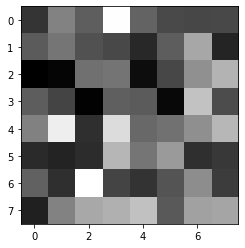

In [15]:
#komprimierte Version anzeigen lassen, 8*8=64, daher bei reshape 8,8
plt.imshow(example.reshape((8,8)), cmap="gray")

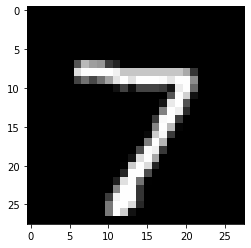

In [16]:
plt.imshow(x_test[0], cmap="gray")

In [17]:
ae_out=autoencoder.predict([x_test[0].reshape(-1, 28, 28, 1)]) [0]

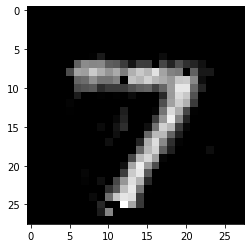

In [18]:
plt.imshow(ae_out, cmap="gray")

In [19]:
#All this function does is iterate through each pixel and randomly, with a default of 5%, change the pixel to be white.
# Noise wird zum image hinzugefügt und dann wieder entfernt
import random

def add_noise(img, random_chance=5):
    noisy = []
    for row in img:
        new_row = []
        for pix in row:
            if random.choice(range(100)) <= random_chance: 
                new_val = random.uniform(0, 1)
                new_row.append(new_val)
            else:
                new_row.append(pix)
        noisy.append(new_row)
    return np.array(noisy)

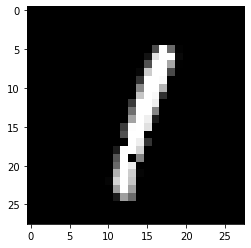

In [20]:
noisy = add_noise (x_test[5])
plt.imshow(noisy, cmap="gray")

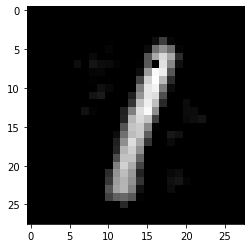

In [21]:
ae_out=autoencoder.predict([noisy.reshape(-1, 28, 28, 1)]) [0]
plt.imshow(ae_out, cmap="gray")